# Peak Detection
This notebook is made for detecting peaks of the snippets extracted in module 2 using the function defined in x


In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [124]:
%run "3.0 - Functions_peakdetection.ipynb"

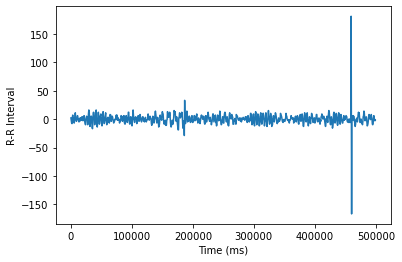

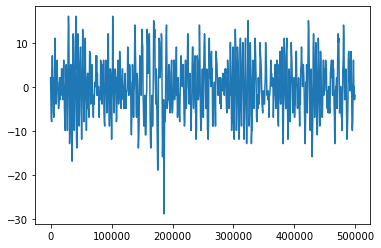

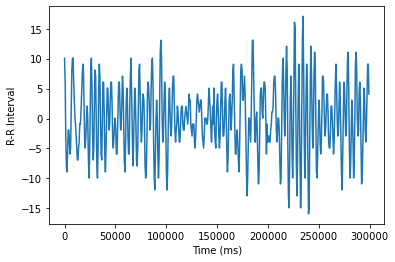

The SDNN is 5.710037127725179
The RMSSD is 4.5167246543492565
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 8314.838832772015
New formula being used
The absolute power of the High Frequency band is 13744.42574170813
The LF/HF is 0.6049608029486624


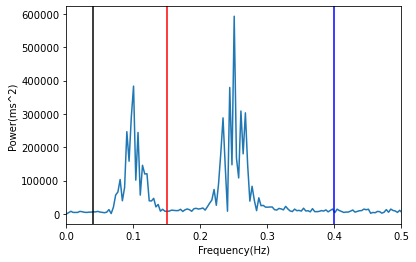

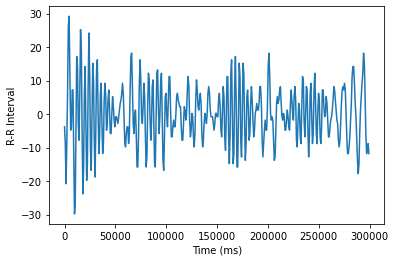

400


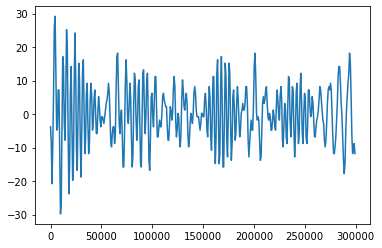

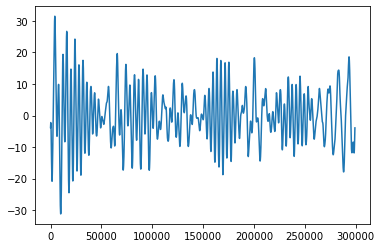

In [95]:
%run "4.0-HRV_Extraction_Function.ipynb"

In [111]:
#root = 'G:\My Drive\Molecool\Databases\Database1'
root = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD/Molecool/Databases/Database1' # Jaume's directoru

  0%|                                                                                                         | 0/56 [00:00<?, ?it/s]

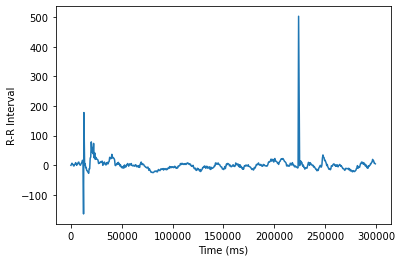

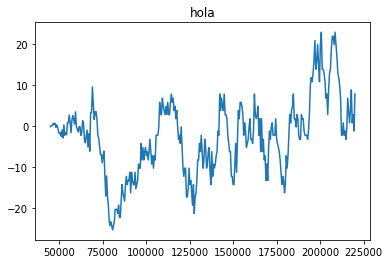

  7%|██████▉                                                                                          | 4/56 [00:02<00:30,  1.71it/s]

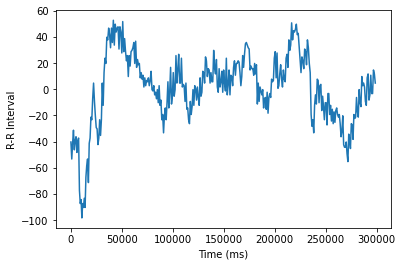

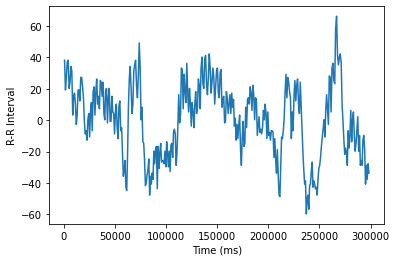

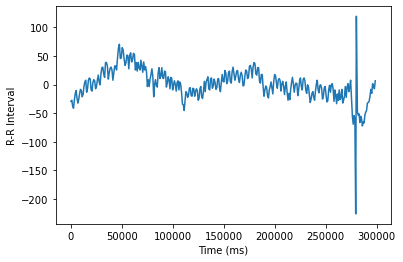

 11%|██████████▍                                                                                      | 6/56 [00:05<00:49,  1.02it/s]

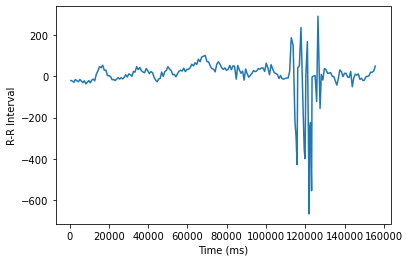

 12%|████████████▏                                                                                    | 7/56 [00:06<00:52,  1.07s/it]

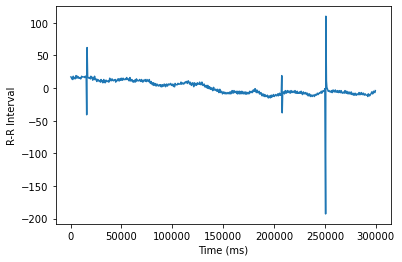

 16%|███████████████▌                                                                                 | 9/56 [00:11<01:17,  1.64s/it]

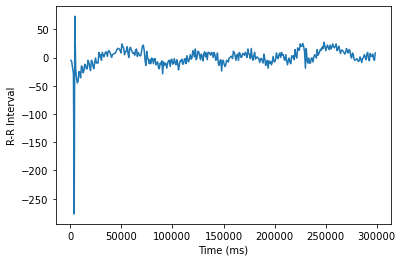

 21%|████████████████████▌                                                                           | 12/56 [00:15<01:05,  1.48s/it]

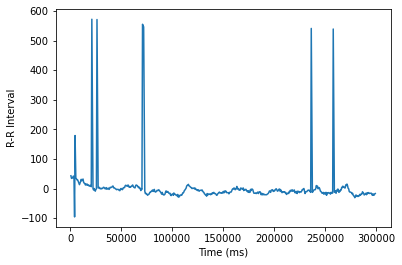

 29%|███████████████████████████▍                                                                    | 16/56 [00:20<00:44,  1.11s/it]

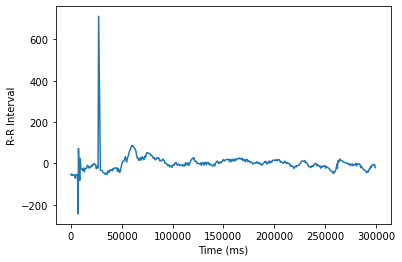

 38%|████████████████████████████████████                                                            | 21/56 [00:28<00:45,  1.31s/it]

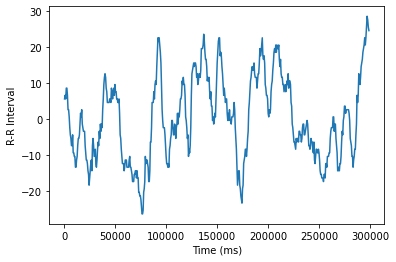

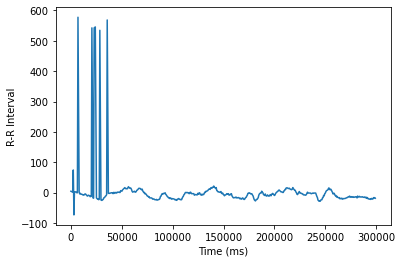

 39%|█████████████████████████████████████▋                                                          | 22/56 [00:31<01:05,  1.92s/it]

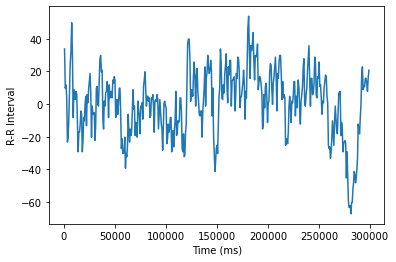

 41%|███████████████████████████████████████▍                                                        | 23/56 [00:33<01:02,  1.90s/it]

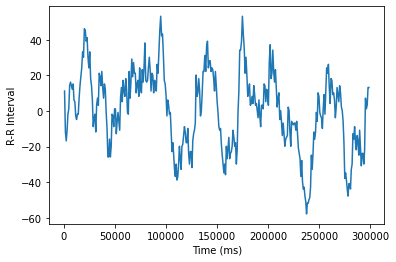

 54%|███████████████████████████████████████████████████▍                                            | 30/56 [00:39<00:27,  1.06s/it]

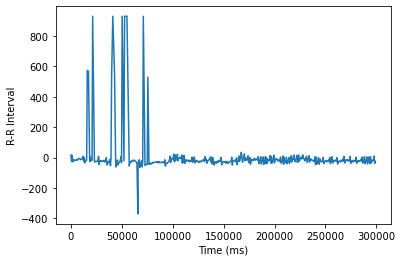

 55%|█████████████████████████████████████████████████████▏                                          | 31/56 [00:41<00:36,  1.44s/it]

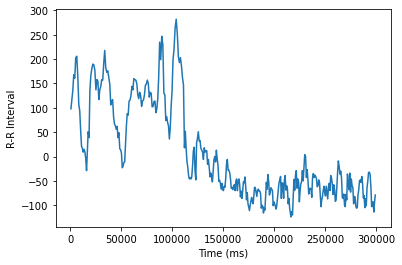

 57%|██████████████████████████████████████████████████████▊                                         | 32/56 [00:43<00:37,  1.55s/it]

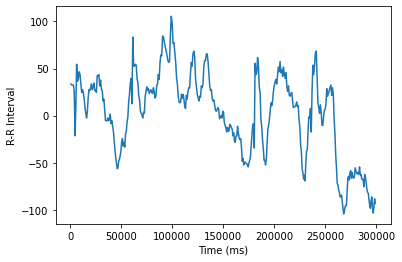

 59%|████████████████████████████████████████████████████████▌                                       | 33/56 [00:45<00:38,  1.68s/it]

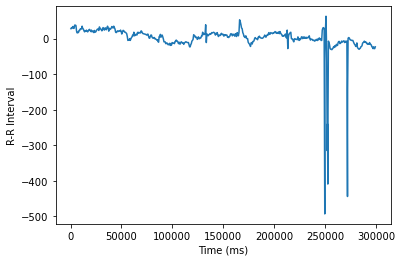

 62%|████████████████████████████████████████████████████████████                                    | 35/56 [00:48<00:28,  1.38s/it]

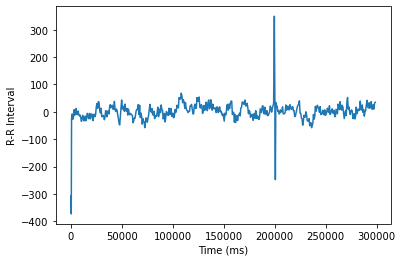

 66%|███████████████████████████████████████████████████████████████▍                                | 37/56 [00:51<00:29,  1.56s/it]

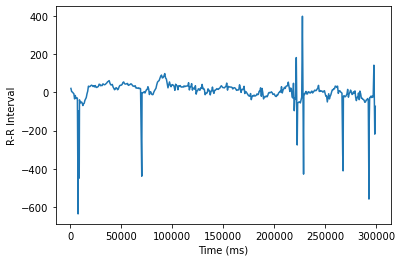

 73%|██████████████████████████████████████████████████████████████████████▎                         | 41/56 [00:58<00:25,  1.72s/it]

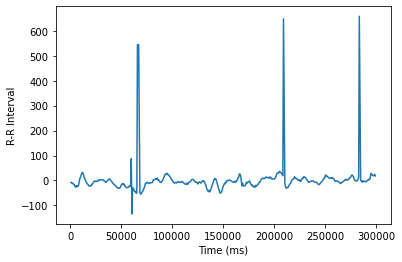

 75%|████████████████████████████████████████████████████████████████████████                        | 42/56 [00:59<00:19,  1.42s/it]

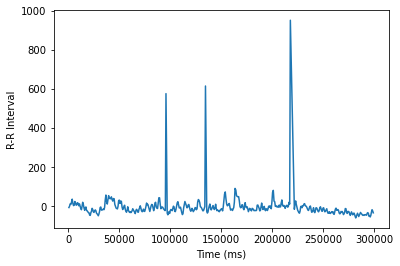

 79%|███████████████████████████████████████████████████████████████████████████▍                    | 44/56 [01:02<00:16,  1.38s/it]

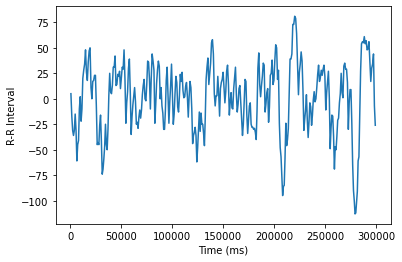

 80%|█████████████████████████████████████████████████████████████████████████████▏                  | 45/56 [01:04<00:18,  1.67s/it]

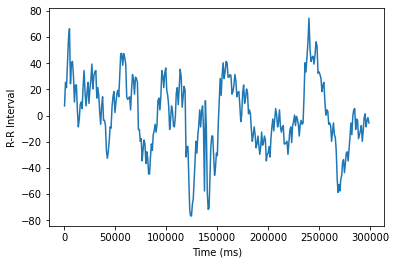

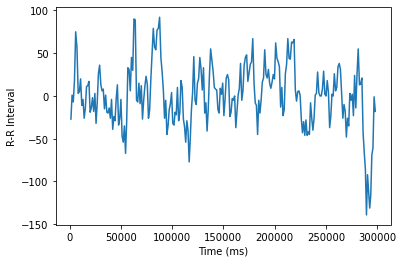

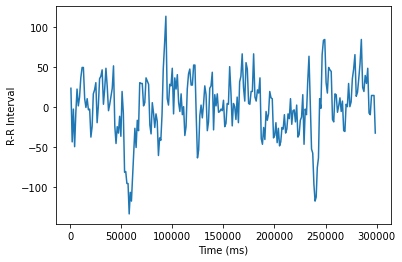

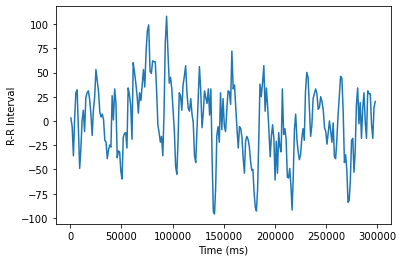

 82%|██████████████████████████████████████████████████████████████████████████████▊                 | 46/56 [01:07<00:19,  1.98s/it]

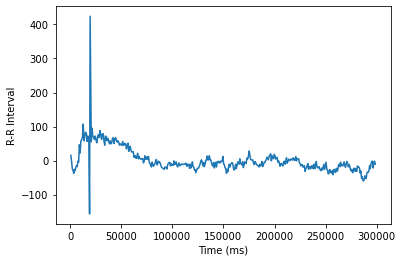

 84%|████████████████████████████████████████████████████████████████████████████████▌               | 47/56 [01:08<00:15,  1.77s/it]

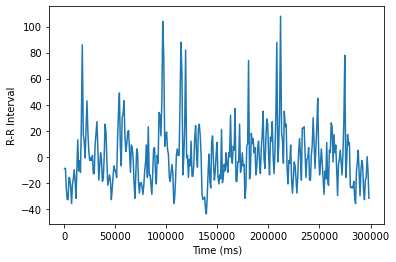

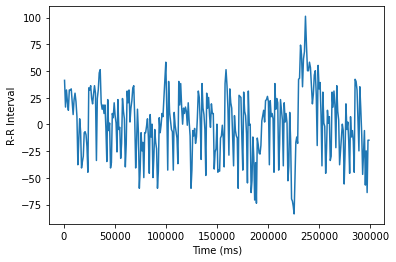

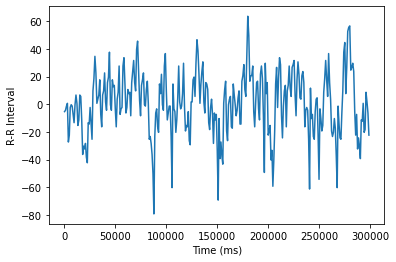

 86%|██████████████████████████████████████████████████████████████████████████████████▎             | 48/56 [01:11<00:16,  2.08s/it]

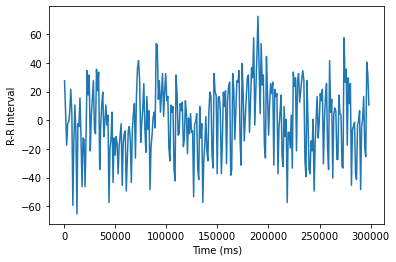

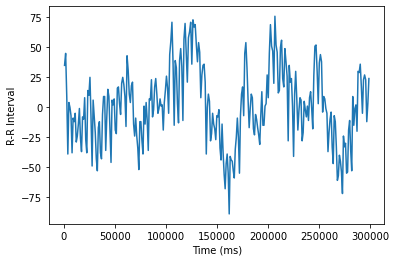

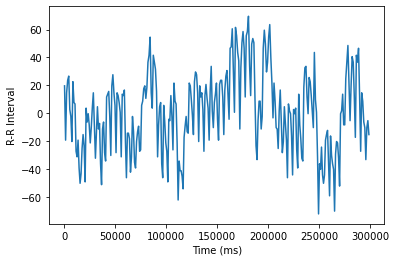

 88%|████████████████████████████████████████████████████████████████████████████████████            | 49/56 [01:14<00:15,  2.28s/it]

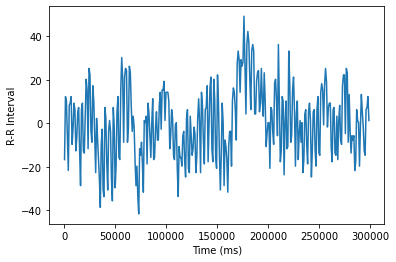

 93%|█████████████████████████████████████████████████████████████████████████████████████████▏      | 52/56 [01:22<00:10,  2.59s/it]

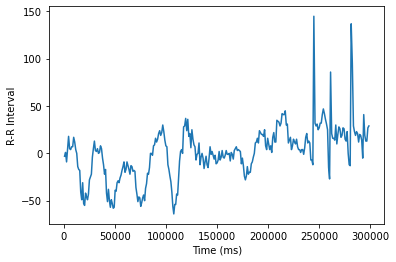

 95%|██████████████████████████████████████████████████████████████████████████████████████████▊     | 53/56 [01:25<00:07,  2.61s/it]

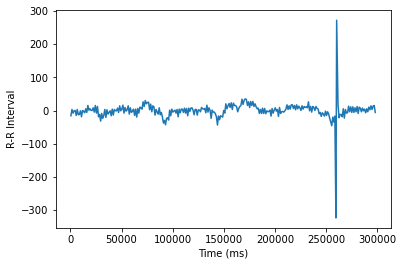

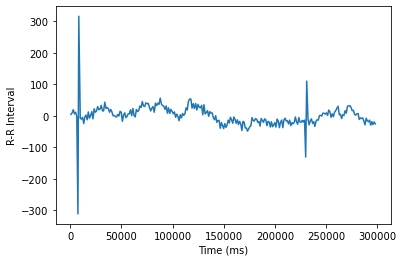

 96%|████████████████████████████████████████████████████████████████████████████████████████████▌   | 54/56 [01:27<00:05,  2.55s/it]

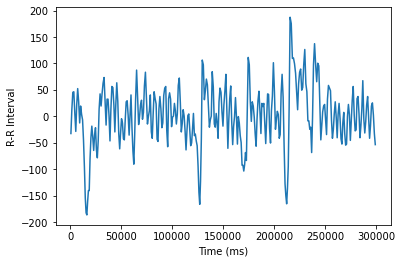

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [01:30<00:00,  1.61s/it]


In [135]:
patients = sorted(os.listdir(root))

for pat in tqdm(patients): #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        read_meta(path_snip)
                        read_peaks(path_snip, samplingRate)
                        read_hrv(path_snip, samplingRate)
                        #read_hrv_std(path_snip, samplingRate)
                        

In [82]:
def read_peaks(path,rate):
    """Function to open snippet files, get peaks, and write them to a new file"""
    df = pd.read_feather(path_snip + '/MSNIP.ftr')   #inputting the ecg feather files in a data frame
    df_peaks = _filteringdet(df['ecg_0'],rate)
    feather.write_feather(df_peaks, (path_snip + '/PEAKS.ftr'))

In [83]:
def read_meta(path):
    """Function that creates a new meta file for peak files"""
#     with open(path + '\ManualMeta.json') as json_file:
#         metaData = json.load(json_file)
#         json_file.close()
    data = {'Error Flag': False, 'Error Type': 'No error'}
    with open((path + '/PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [84]:
def read_meta_clean(path,length):
    data = {'Error Flag': False, 'Length': length, 'Error Type': 'No error'}
    with open((path + '/CleanPeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [85]:
def find_rate(path):
    with open(path + '/Meta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return int(metaData['Sampling rate'])

In [134]:
def read_hrv(path,rate):
    if path == root + "/S0250/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 45000 and value <= 220000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        plt.plot(df_clean['x_values'],df_clean['R-R Interval Final'])
        plt.title('hola')
        plt.show()
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0273/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 50000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0273/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 0 and value <= 250000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0282/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 0 and value <= 100500:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0283/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 50000 and value <= 200000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0288/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 20000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0300/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 100000 and value <= 200400:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0310/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 100000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0317/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 50000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0318/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 0 and value <= 250000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0366/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 100000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0372/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 0 and value <= 250000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0381/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 0 and value <= 2300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0398/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 90000 and value <= 200000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0416/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 100000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0424/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 100000 and value <= 300000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0435/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 0 and value <= 250000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0435/holter/Snippet004":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        x_values = []
        rr_values = []
        for index,value in enumerate(df_hrv['x_values']):
            if value >= 25000 and value <= 200000:
                x_values.append(value)
                rr_values.append(df_hrv['R-R Interval Final'][index])
        df_clean['R-R Interval Final'] = rr_values
        df_clean['x_values'] = x_values
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0273/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0317/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0326/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0368/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0390/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0409/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0420/holter/Snippet004":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0423/holter/Snippet000":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0423/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0423/holter/Snippet003":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0423/holter/Snippet004":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0426/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0426/holter/Snippet003":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0426/holter/Snippet004":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0427/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0427/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0427/holter/Snippet004":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0430/holter/Snippet003":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0434/holter/Snippet001":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))
    if path == root + "/S0441/holter/Snippet002":
        df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
        df_hrv = RR_calculator(df)
        df_clean = pd.DataFrame()
        df_clean['R-R Interval Final'] = df_hrv['R-R Interval Final']
        df_clean['x_values'] = df_hrv['x_values']
        df_clean = _outlier_removal(df_clean)
        rr = df_clean['R-R Interval Final'].to_list()
        list_end = cos_correction(rr)
        df_clean['R-R Interval Final'] = list_end
        feather.write_feather(df_clean, (path_snip + '/clean_snippet.ftr'))
        read_meta_clean(path,len(df_clean['R-R Interval Final']))

In [65]:
def read_hrv_std(path,rate):
    df = pd.read_feather(path_snip + '/PEAKS.ftr')   #inputting the ecg feather files in a data frame
    df_hrv = RR_calculator(df)
    df_clean = pd.DataFrame()
    df_clean['R-R Interval Final'] = cos_correction(df_hrv['R-R Interval Final'])
    df_clean['x_values'] = df_hrv['x_values']
    return df_clean

  0%|                                                                                                         | 0/56 [00:00<?, ?it/s]

In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder Snippet000


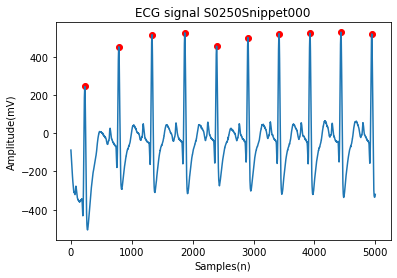

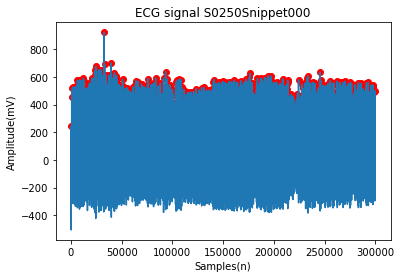

In snippet folder Snippet000\PeakMeta.json
In snippet folder Snippet001


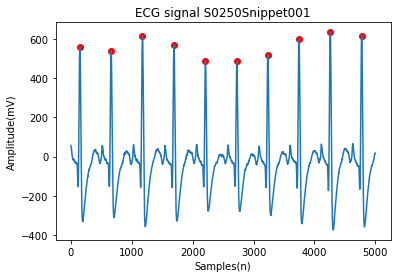

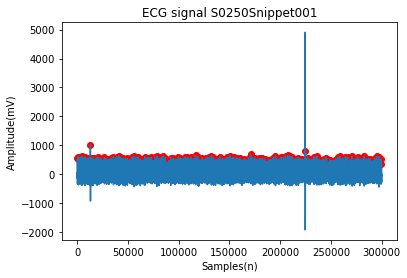

In snippet folder Snippet002


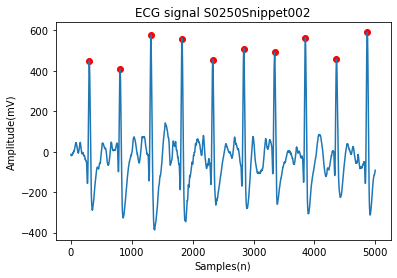

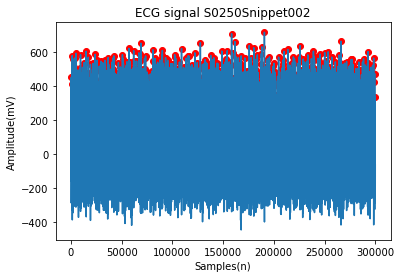

  4%|███▍                                                                                             | 2/56 [00:01<00:34,  1.57it/s]

In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder Snippet000


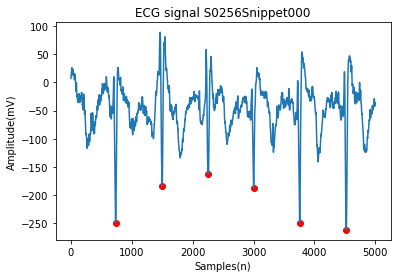

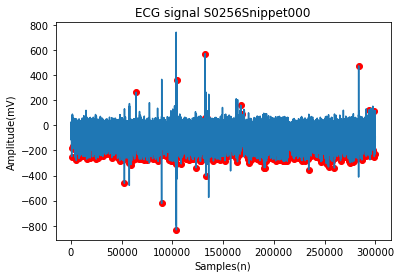

  7%|██████▉                                                                                          | 4/56 [00:01<00:23,  2.22it/s]

In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder ECG.ftr
In snippet folder Icon
In snippet folder Meta.json
In snippet folder Snippet000


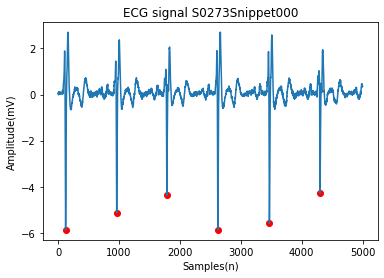

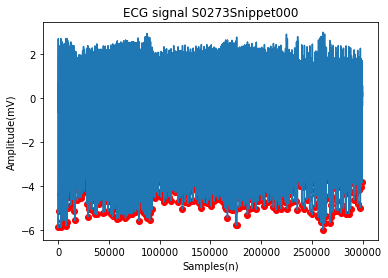

In snippet folder Snippet001


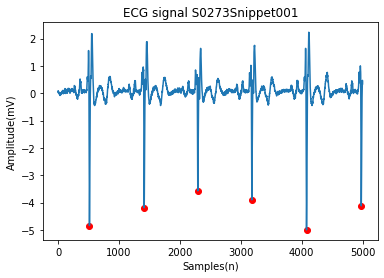

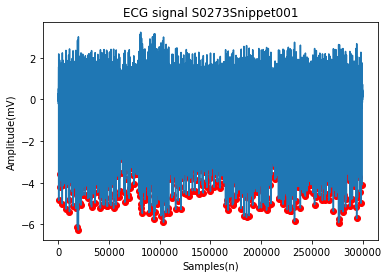

In snippet folder Snippet002


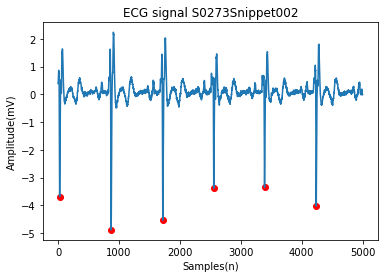

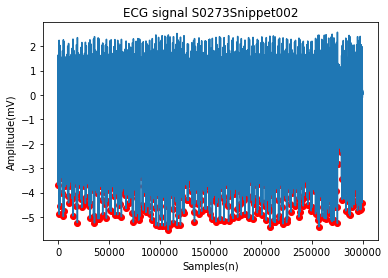

In snippet folder Snippet003


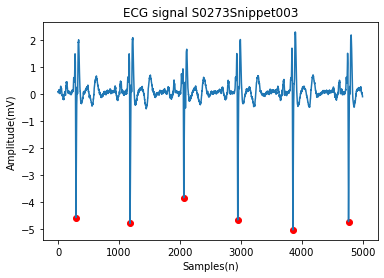

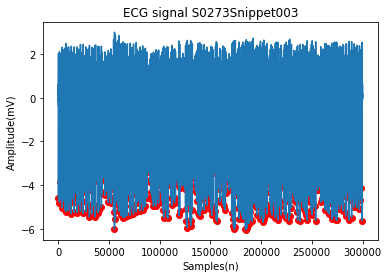

In snippet folder Snippet004


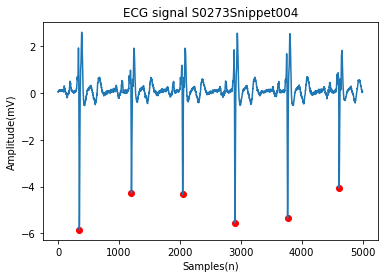

  9%|████████▋                                                                                        | 5/56 [00:04<00:46,  1.11it/s]


KeyboardInterrupt: 

In [29]:
# Check to see the state of the peaks
count = 0
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    print("In snippet folder " + snip_folder)
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        df = pd.read_feather(path_snip + '/MSNIP.ftr')
                        df_signal = df['ecg_0']
                        df_peaks = pd.read_feather(path_snip + '/PEAKS.ftr')
                        
                        y_values = []
                        for point in df_peaks['x_values']:
                            if point >= 0 and point < 5000:
                                y_values.append(df_signal[point])
                    
                        #print(y_values)
                        #print(df_peaks[df_peaks['x_values'] < 5000])

                        plt.plot(df_signal[0:5000])
                        plt.title('ECG signal ' + pat + snip_folder)
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks[df_peaks['x_values'] < 5000]['x_values'],y_values,marker='o',c='red')
                        plt.show()
                        
                        plt.plot(df_signal)
                        plt.title('ECG signal ' + pat + snip_folder)
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks['x_values'],df_peaks['y_values'],marker='o',c='red')
                        plt.show()
                        count += 1
                        
print(count)

## Checking snippets for accurate peak detection

In [ ]:
%matplotlib notebook

In [ ]:
path_snip = root + "\\S0256\\holter\\Snippet000"
df = pd.read_feather(path_snip + '/MSNIP.ftr')
df_signal = df['ecg_0']
df_peaks = pd.read_feather(path_snip + '/PEAKS.ftr')
                        
                          
plt.plot(df_signal)
plt.title('ECG signal ')
plt.xlabel('Samples(n)')
plt.ylabel('Amplitude(mV)')
plt.scatter(df_peaks['x_values'],df_peaks['y_values'],marker='o',c='red')
plt.show()

In [ ]:
# Definitely bad snippets
badApples = ["\\S0282\\holter\\Snippet002","\\S0296\\holter\\Snippet000","\\S0296\\holter\\Snippet001","\\S0296\\holter\\Snippet002","\\S0366\\holter\\Snippet001","\\S0366\\holter\\Snippet002","\\S0406\\holter\\Snippet001","\\S0406\\holter\\Snippet002","\\S0430\\holter\\Snippet000","\\S0432\\holter\\Snippet003"]

In [ ]:
# Flagging the snippets with bad peak detection
for snip in badApples:
    snip_path = root + snip
    
    data = {'Error Flag': True, 'Error Type': 'Badly detected peaks (through manual inspection)'}
        
    with open((snip_path + '/PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()
    